<a href="https://www.kaggle.com/code/abdallhwerby/eda-training-and-evaluation-for-california-housing?scriptVersionId=106446435" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# We are dealing with a data set of California housing prices.
## The business model of this dataset is made to predict the prices of houses.

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder


In [2]:
data = pd.read_csv (r'../input/california-housing-prices/housing.csv')

In [3]:
plt.rcParams['axes.facecolor'] = 'Beige'

# Exploratory Data Analysis (EDA)


## Take a quick look at the data:

In [4]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


## Check column number, types:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## 11 Columns

In [6]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

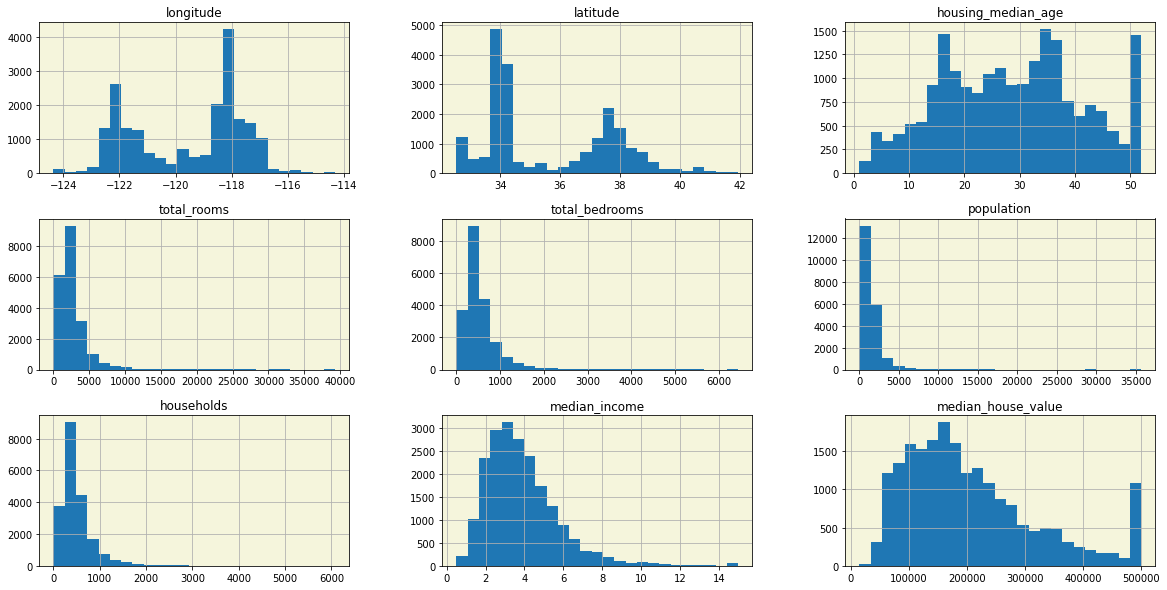

In [7]:
data.hist(bins=25,figsize=(20,10));

## Visualizing Geographical Data


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

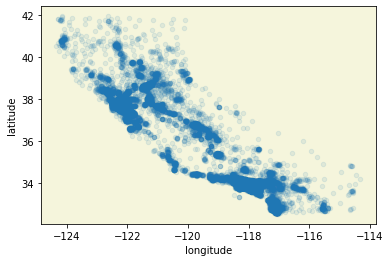

In [8]:
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

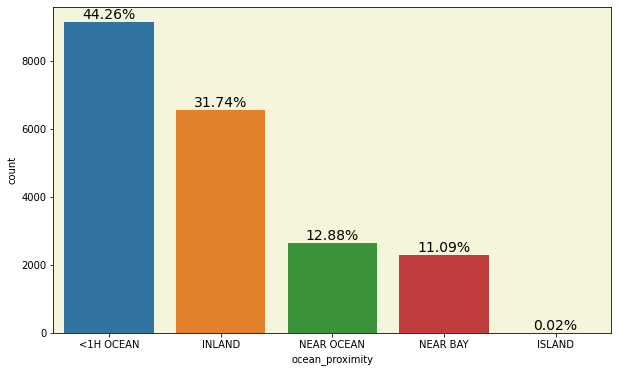

In [9]:
ocean_values = data["ocean_proximity"].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(x = "ocean_proximity",data=data,order=ocean_values.index)

# To show the percenotge
for i in range(ocean_values.shape[0]):
    count = ocean_values[i] 
    strt='{:0.2f}%'.format(100*count / data.shape[0]) 
    plt.text(i, count+100, strt, ha='center', color='black', fontsize=14) 

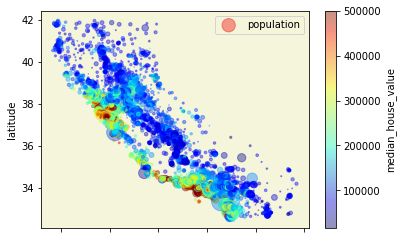

In [10]:
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
         s=data["population"]/100,label="population",
         c="median_house_value",cmap=plt.get_cmap("jet"),
         colorbar=True)
plt.legend()

## Understanding our data:
### We use correlation matrix 

In [11]:
corr_matrix=data.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


### But Plotting a correlation plot is actually clearer 

<AxesSubplot:>

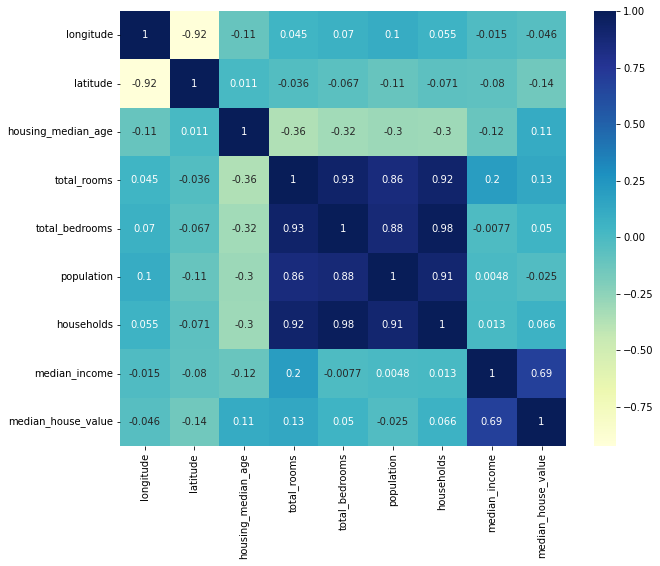

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

### To understand the correlation plot: it creates a relation between 2 variables and checks if it's proportional(higher than 0.5) or inversely proportional (less than -0.5) , or no relation (close to zero)
#### Understanding the correlation between columns helps you make a better model as the insertion of lesser important columns will actually cause bias or corrupt the model.
#### For example: We actually have no correlation between housing median age and other columns, but it's an important data that should be considered, also no correlation between longitude, latitude and other columns, but dropping it now will actually corrupt data, we comlete missing values, thn we drop

## Is there missing data in our dataset?

In [13]:
print(data.isnull().values.any())

True


## But where and how much is the missing data?

<AxesSubplot:>

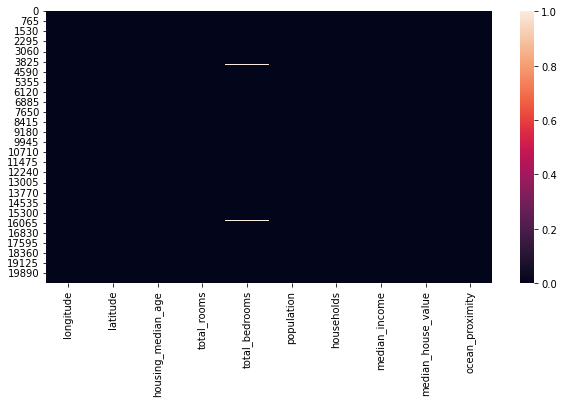

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap( data.isnull())

#### Total bedrooms column has some missing data

In [15]:
# Check the percentage of Nan in dataset
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data['population'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
total_bedrooms,207,0.010029
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


### We have 207 missing data in total bedrooms 

## Cleaning the data:
### We will remove any rows that are all Null as it will corrupt the data

In [16]:
print(data.dropna(axis=0,how ='all'))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

### But if there's some rows with alot of missing values, we should remove all rows with more than 2 missing values as filling more than 2 rows could corrupt the data, we use threshold = 8.

In [17]:
print(data.dropna(axis=0,thresh=8).tail())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAN

## Before completing the missing values, we check the distribution to decide the better representation of central tendency:

<AxesSubplot:xlabel='total_bedrooms'>

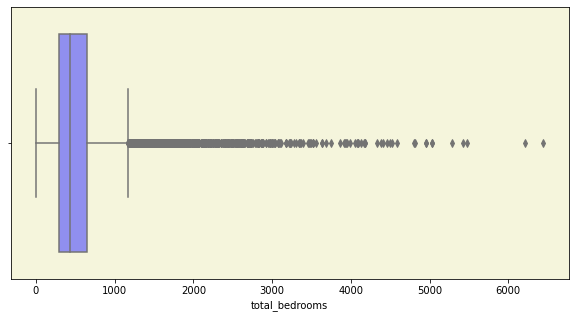

In [18]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'total_bedrooms',palette = 'cool', data=data)

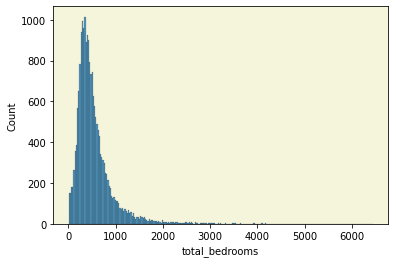

In [19]:
sns.histplot(x= 'total_bedrooms',data=data)
plt.show()


#### It's negatively skewed with alof of outliers so we use "Median" as central tendency representaion.

## filling missing data:
### We should check that all values are numerical.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Ocean proximity is categorical column than needs to be converted to numerical.
#### We use encoding method

In [21]:
le = LabelEncoder()
data['ocean_proximity']=le.fit_transform(data['ocean_proximity'])
data['ocean_proximity'].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


## Filling missing using imputer

In [23]:
# data['total_bedrooms'].fillna(int(data['total_bedrooms'].median()),inplace=True) is a method but nah
# After we have actually imported simple imputer from sk learn
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(data[['total_bedrooms']])
data['total_bedrooms'] = imputer.transform(data[['total_bedrooms']])
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


### We check if there's a missing data still:

In [24]:
print(data.isnull().values.any())

False


### We reomve longitude, lattitude as the correlations are small.

In [25]:
data = data.drop(columns=(['longitude','latitude']))
data.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', 'ocean_proximity'],
      dtype='object')

# Outliers:

### To find outliers we use describe 

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,536.838857,419.391878,1.0000,297.0000,435.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000
ocean_proximity,20640.0,1.165843,1.420662,0.0000,0.0000,1.0000,1.00000,4.0000


<AxesSubplot:>

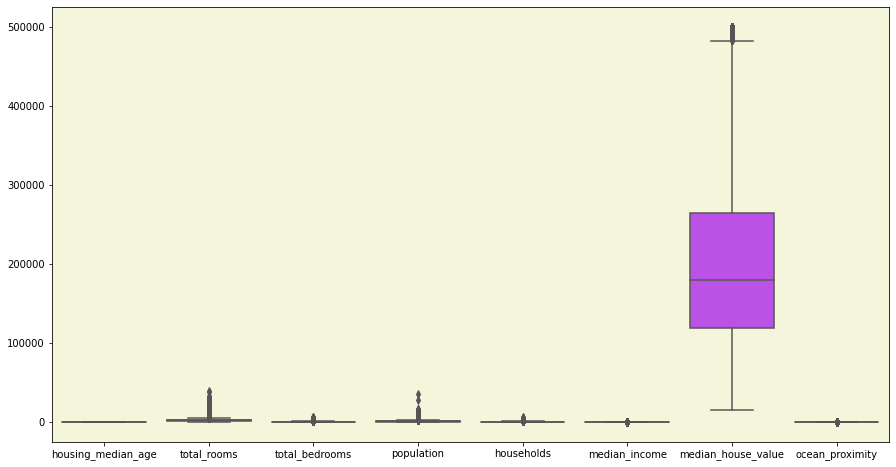

In [27]:
plt.figure(figsize = (15,8))
sns.boxplot(palette = 'cool', data=data)

### We foud outliers that is better be located using a scatter plot

<AxesSubplot:xlabel='population', ylabel='median_income'>

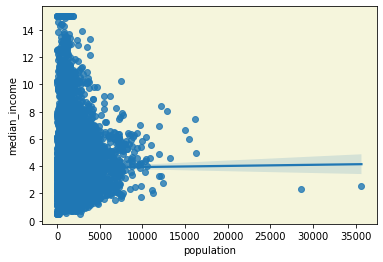

In [28]:
sns.regplot(x='population', y= 'median_income', data = data)

<AxesSubplot:xlabel='total_rooms', ylabel='total_bedrooms'>

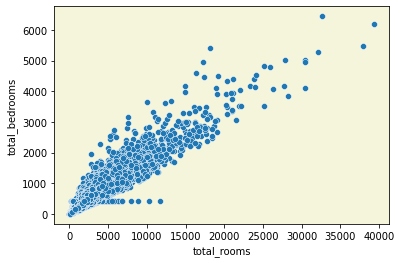

In [29]:
sns.scatterplot(x='total_rooms', y= 'total_bedrooms', data = data)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

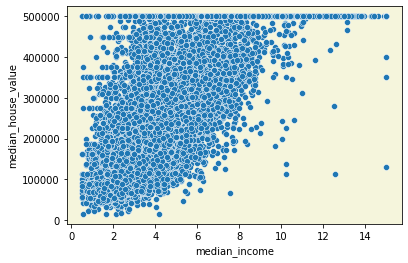

In [30]:
sns.scatterplot(x='median_income', y= 'median_house_value', data = data)

<AxesSubplot:xlabel='median_income', ylabel='households'>

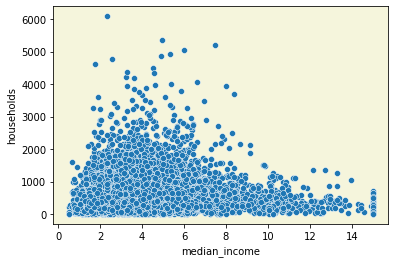

In [31]:
sns.scatterplot(x='median_income', y= 'households', data = data)

In [32]:
data = data.drop(data[data['total_rooms']>16000].index)
data = data.drop(data[data['total_bedrooms']>2500].index)
data = data.drop(data[data['population']>7000].index)
data = data.drop(data[data['households']>2500].index)
data = data.drop(data[data['median_income']>12].index)

<AxesSubplot:xlabel='population', ylabel='total_rooms'>

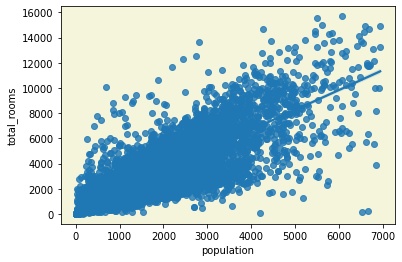

In [33]:
sns.regplot(x='population', y= 'total_rooms', data = data)

<AxesSubplot:>

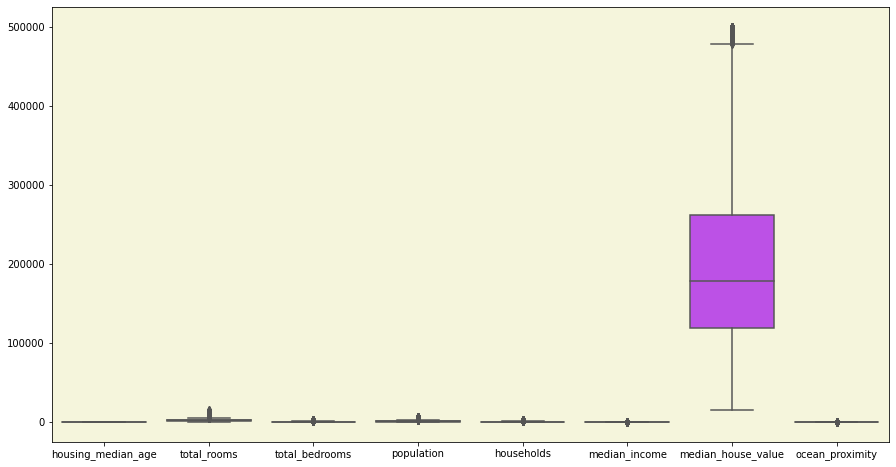

In [34]:
plt.figure(figsize = (15,8))
sns.boxplot(palette = 'cool', data=data)

## Feature engineering:
### We can add 2 more columns


In [35]:
#data["rooms_per_household"]=data["total_rooms"]/data["households"]
#data["bedrooms_per_room"]=data["total_bedrooms"]/data["total_rooms"]
#data["population_per_household"]=data["population"]/data["households"] 

## Splitting data 

## Splitting:

In [36]:
reg = linear_model.LinearRegression()

### We rearrange columns: 
    

In [37]:
data = data[['housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'ocean_proximity', "median_house_value"]]
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,1,78100.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,1,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,1,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,1,84700.0


### To create the proper comparison we drop house value column from x and make it y

In [38]:
x = data.drop(['median_house_value'] , axis = 1).values
y= data['median_house_value' ].values

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)

In [41]:
x_train.shape

(15265, 7)

In [42]:
y_train.shape

(15265,)

# Scaling
### Make sure all data aren't categorical

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20354 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20354 non-null  float64
 1   total_rooms         20354 non-null  float64
 2   total_bedrooms      20354 non-null  float64
 3   population          20354 non-null  float64
 4   households          20354 non-null  float64
 5   median_income       20354 non-null  float64
 6   ocean_proximity     20354 non-null  int64  
 7   median_house_value  20354 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.4 MB


In [44]:
from sklearn.preprocessing import RobustScaler

#### We used Robust scaler to reduce the effect 

In [45]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [46]:
x_train.shape

(15265, 7)

## Linear regression

In [47]:
reg.fit(x_train , y_train)
reg.score(x_train , y_train)


0.5884885620352134

In [48]:
reg.score(x_test , y_test)

0.5716415997264044

In [49]:
reg.coef_

array([ 35511.21564346, -47119.17314718,  44863.59903199, -42077.7937575 ,
        52009.02675533, 113990.11748673,   3832.70967905])

In [50]:
pd.DataFrame(reg.coef_ , data.columns[:-1] ,  columns=['Coeficient'])

,Coeficient
housing_median_age,35511.215643
total_rooms,-47119.173147
total_bedrooms,44863.599032
population,-42077.793757
households,52009.026755
median_income,113990.117487
ocean_proximity,3832.709679


In [51]:
y_pred =reg.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data.head(10)

,Y_test,Y_pred
0,153100.0,193766.644469
1,199200.0,221325.862155
2,258000.0,250288.495733
3,166000.0,245240.690637
4,225000.0,107272.233752
5,500001.0,282311.332539
6,49000.0,64562.561519
7,500001.0,573065.026314
8,331000.0,300222.612355
9,169400.0,162330.799912


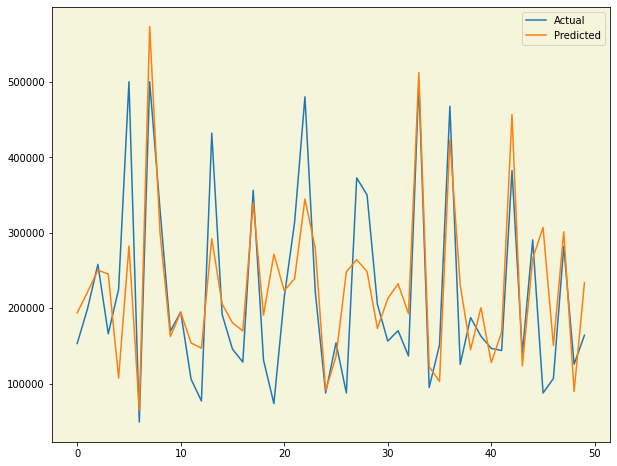

In [52]:
plt.figure(figsize=(10,8))
plt.plot(data[:50])
plt.legend(["Actual" , "Predicted"])

# Evaluation:

In [53]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
def run_experiment(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
run_experiment(model)

R^2 :  0.5716415997264044
MAE : 55224.97355993511
RMSE: 74745.26703319717


### Another regression evaluation model

In [55]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
run_experiment(model)

R^2 :  0.5719860941812198
MAE : 55094.69298430239
RMSE: 74715.20516314228


In [56]:
def run_experiment(model):
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    plot_confusion_matrix(model, x_test, y_test, cmap='GnBu')
    plt.show()
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('F1: %.3f' % f1_score(y_test, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))